In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This is the link to the dataset : https://www.kaggle.com/uciml/student-alcohol-consumption
    
The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students. 
The goal of the project is to understand the effect of alcohol consumption on the final grade and what are the most influencing factors that influence the final grade.

In [2]:
df=pd.read_csv('students.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Are there null values?

No null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
categorical = df.columns

### How are the distributions of the variables?

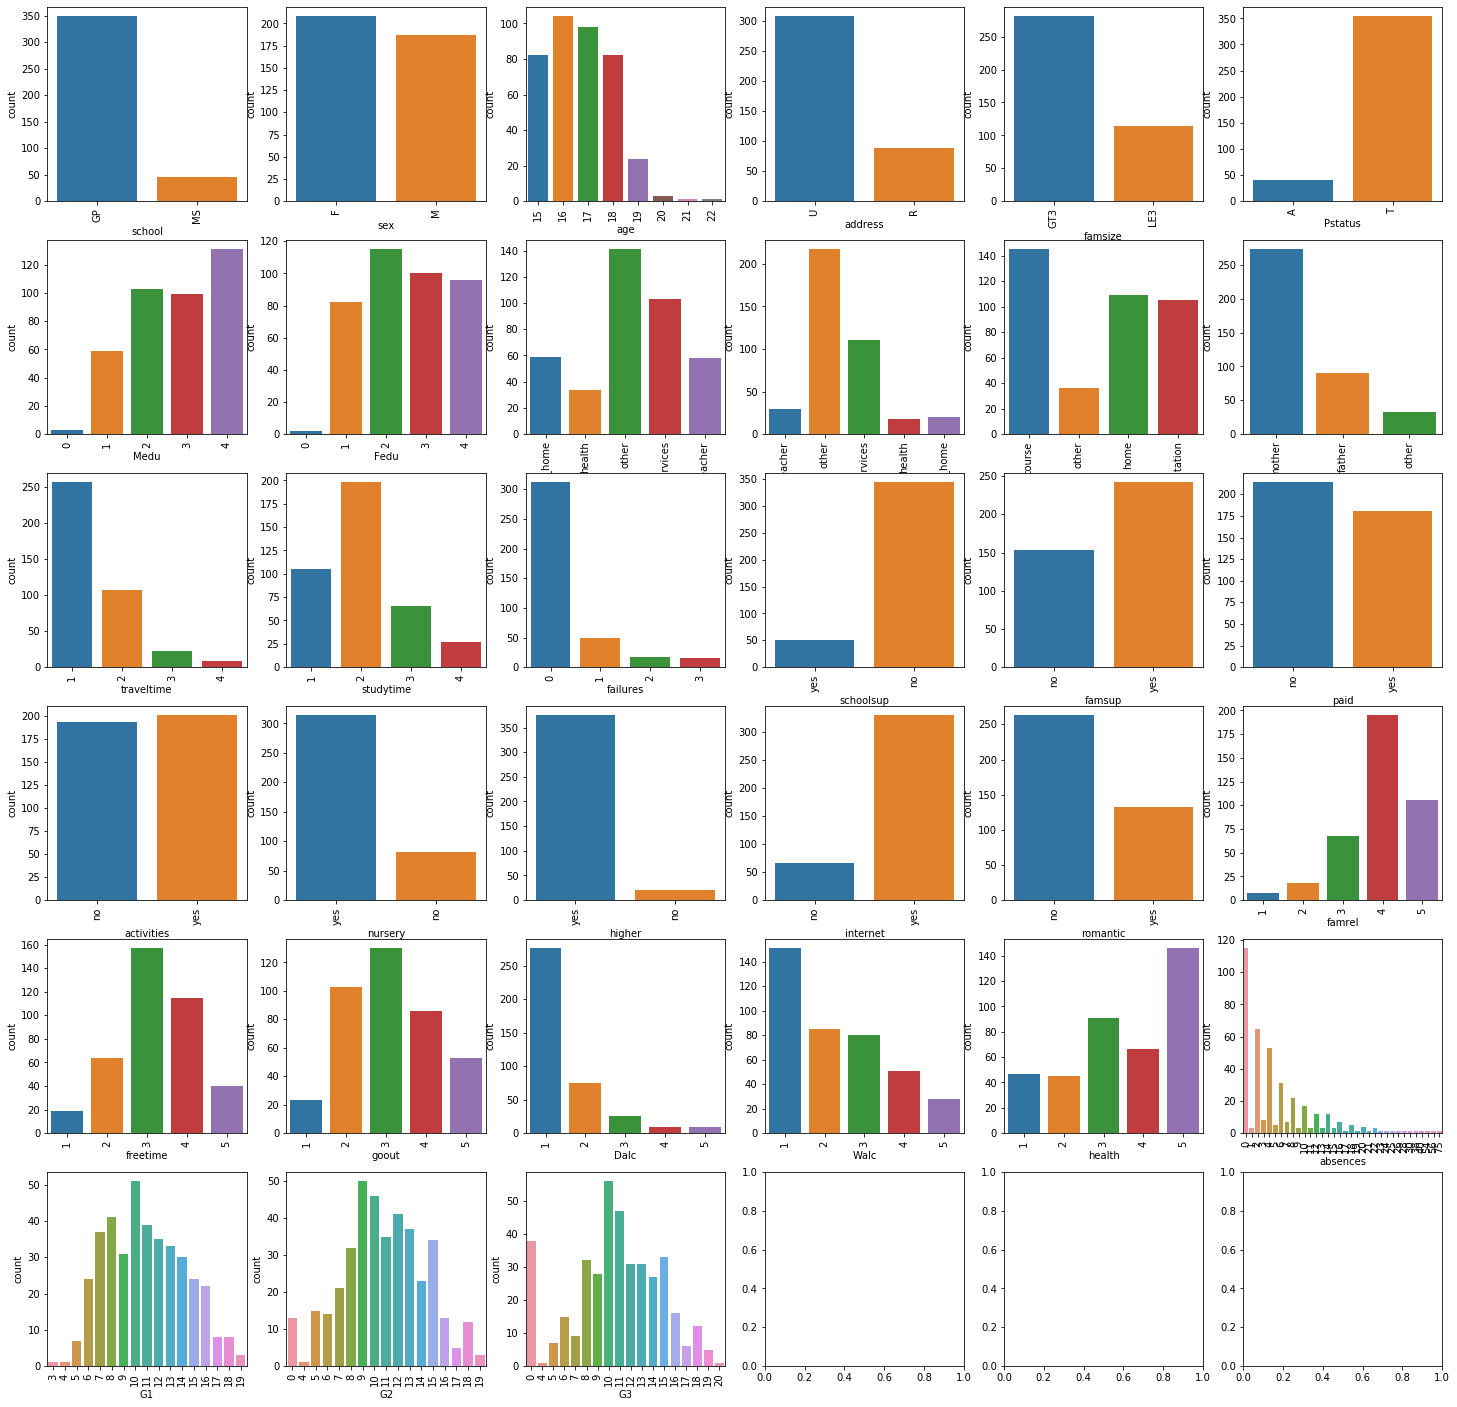

In [6]:
fig, ax = plt.subplots(6, 6, figsize=(25, 25))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [7]:
# categories to change : 4,5,6,7,8,9,10,11

In [8]:
df['total_grade'] = df['G1']+ df['G2'] + df['G3']

In [9]:
df['total_grade'] = df['total_grade']/3

In [10]:
df['parents_edu'] = df['Medu'] +df['Fedu']

In [11]:
df['parents_edu'] = df['parents_edu'] /2

In [12]:
df['alcohol_cons'] = df['Dalc'] + df['Walc']

In [13]:
df['alcohol_cons'] = df['alcohol_cons']/2

In [14]:
df['time_out'] = df['freetime'] + df['goout']

In [15]:
df['time_out'] = df['time_out']/2

### How does alcohol consumption - during the week, during the weekend and cumulatively affect the overall grade? it affects the grades negatively!

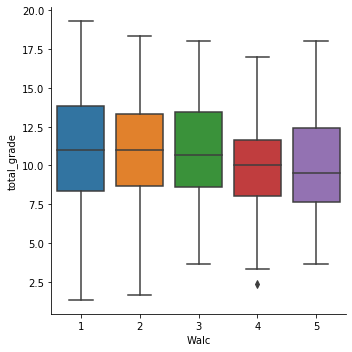

In [16]:
sns.catplot(x="Walc", y="total_grade",
            data=df,
            kind="box")

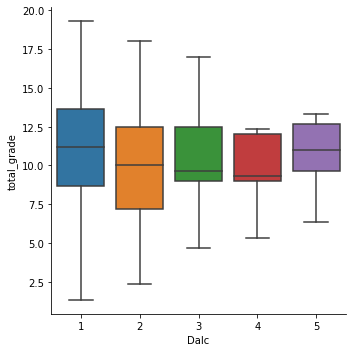

In [17]:
sns.catplot(x="Dalc", y="total_grade",
            data=df,
            kind="box"
           )

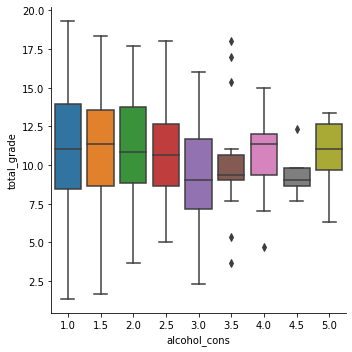

In [18]:
sns.catplot(x="alcohol_cons", y="total_grade",
            data=df,
            kind="box"
           )

In [19]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,total_grade,parents_edu,alcohol_cons,time_out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,3,6,5,6,6,5.666667,4.0,1.0,3.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,3,4,5,5,6,5.333333,1.0,1.0,3.0


In [20]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,total_grade,parents_edu,alcohol_cons,time_out
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325,2.635443,1.886076,3.172152
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786,0.983369,0.992195,0.847202
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333,0.500000,1.000000,1.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333,2.000000,1.000000,2.500000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667,2.500000,1.500000,3.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333,3.500000,2.500000,4.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333,4.000000,5.000000,5.000000


In [21]:
#cutoffprice = 106 + (2*240)
#df1.drop(df1.loc[df1['minimum_nights']> cutoffmn].index, inplace=True)
#df1.drop(df1.loc[df1['number_of_reviews']> cutoffne].index, inplace=True)
#df1.drop(df1.loc[df1['reviews_per_month']> cutoffrpm].index, inplace=True)
#df1.drop(df1.loc[df1['calculated_host_listings_count']> cutoffhlc].index, inplace=True)

df.drop(df.loc[df['absences']> 5 + (8*2)].index, inplace=True)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df:
    if df[col].dtypes=='object':
        df[col]=le.fit_transform(df[col])

In [24]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,total_grade,parents_edu,alcohol_cons,time_out
0,0,0,18,1,0,0,4,4,0,4,...,1,3,6,5,6,6,5.666667,4.0,1.0,3.5
1,0,0,17,1,0,1,1,1,0,2,...,1,3,4,5,5,6,5.333333,1.0,1.0,3.0


In [25]:
df.drop(['G1', 'G2','G3','Dalc','Walc','goout','freetime','Medu','Fedu'], axis = 1, inplace=True) 

### Correlation plot of the features

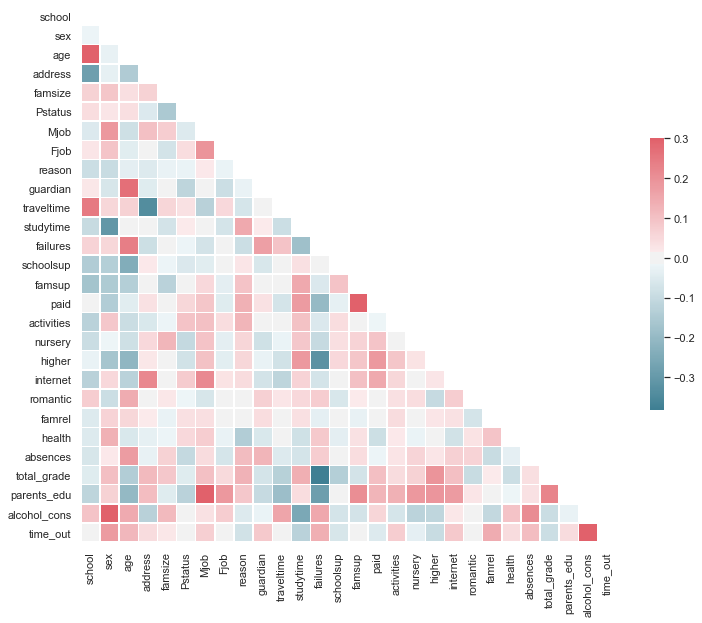

In [26]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlation with the response variable

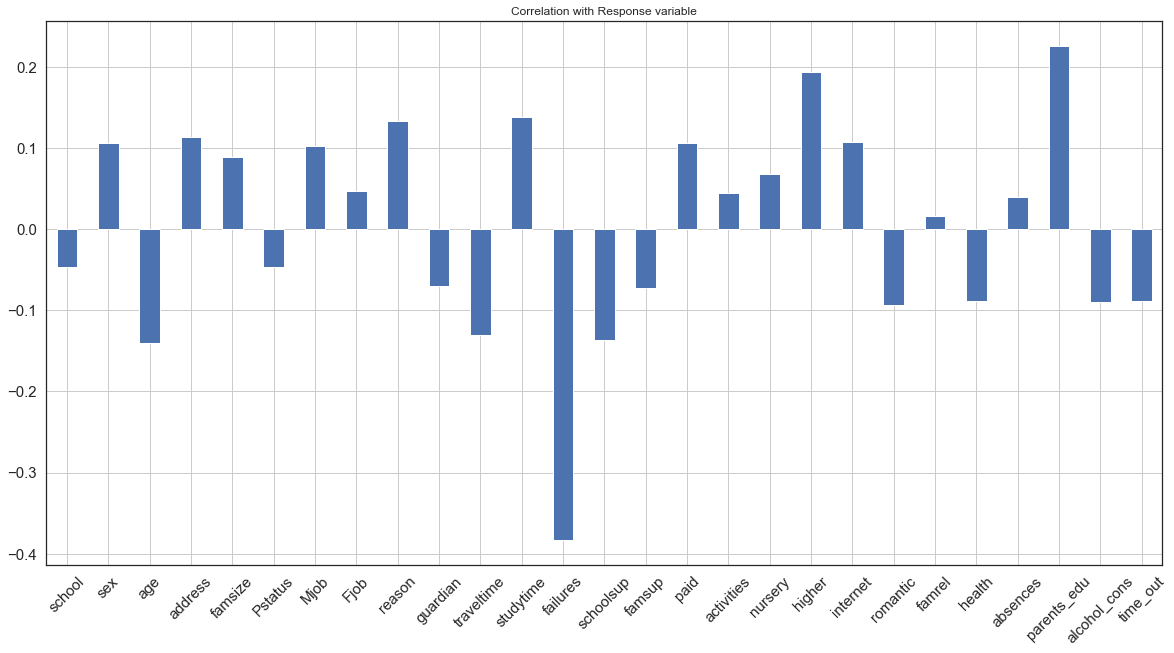

In [27]:
df.drop(columns = ['total_grade']
    ).corrwith(df.total_grade).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

### Distribution of the grades

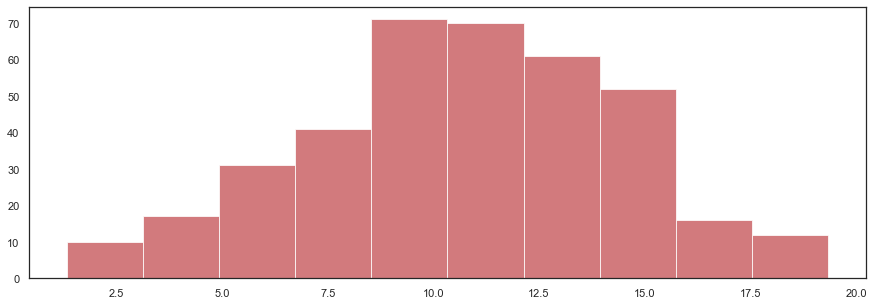

In [31]:
plt.figure(figsize=(15,5))

plt.hist(df['total_grade'], facecolor='r', alpha=0.75)
plt.show()

In [32]:
df['total_grade'].median()

10.666666666666666

In [33]:
df['total_grade'].std()

3.7172919069019397

In [34]:
y = df['total_grade'].values

In [35]:
df1 = df.drop(['total_grade'], axis = 1) 

### Data preprocessing 

In [36]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = df1
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [37]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestRegressor


In [83]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': range(1,10,2),
    'min_samples_leaf': [30,50, 80,100],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,70,100]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': True, 'max_depth': 9, 'min_samples_leaf': 30, 'min_samples_split': 10, 'n_estimators': 50} 0.10909831373040889


C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [84]:
RF_model =RandomForestRegressor(bootstrap= True,
 max_depth= 9,
 min_samples_leaf= 10,
 min_samples_split= 30,
 n_estimators= 50)
RF_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
y_predRF = RF_model.predict(X_test)

####  Model evaluation and feature importance ranking

In [86]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRF))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  2.8631990747858547
Mean Squared Error:  12.878035780113585
Root Mean Squared Error:  3.5885980243144515
Explained Variance Score:  0.25108457476933577
R squared 0.25108343839759606


Feature ranking:
1. feature 12 (0.368161)
2. feature 23 (0.165299)
3. feature 24 (0.054576)
4. feature 13 (0.041513)
5. feature 6 (0.040644)
6. feature 8 (0.034412)
7. feature 22 (0.033761)
8. feature 11 (0.029129)
9. feature 2 (0.028648)
10. feature 7 (0.028593)
11. feature 1 (0.026179)
12. feature 26 (0.022942)
13. feature 25 (0.022483)
14. feature 14 (0.014788)
15. feature 16 (0.012486)
16. feature 4 (0.010590)
17. feature 21 (0.010396)
18. feature 17 (0.010216)
19. feature 15 (0.009979)
20. feature 3 (0.009058)
21. feature 10 (0.008785)
22. feature 9 (0.008150)
23. feature 20 (0.004256)
24. feature 19 (0.003628)
25. feature 5 (0.001328)
26. feature 18 (0.000000)
27. feature 0 (0.000000)


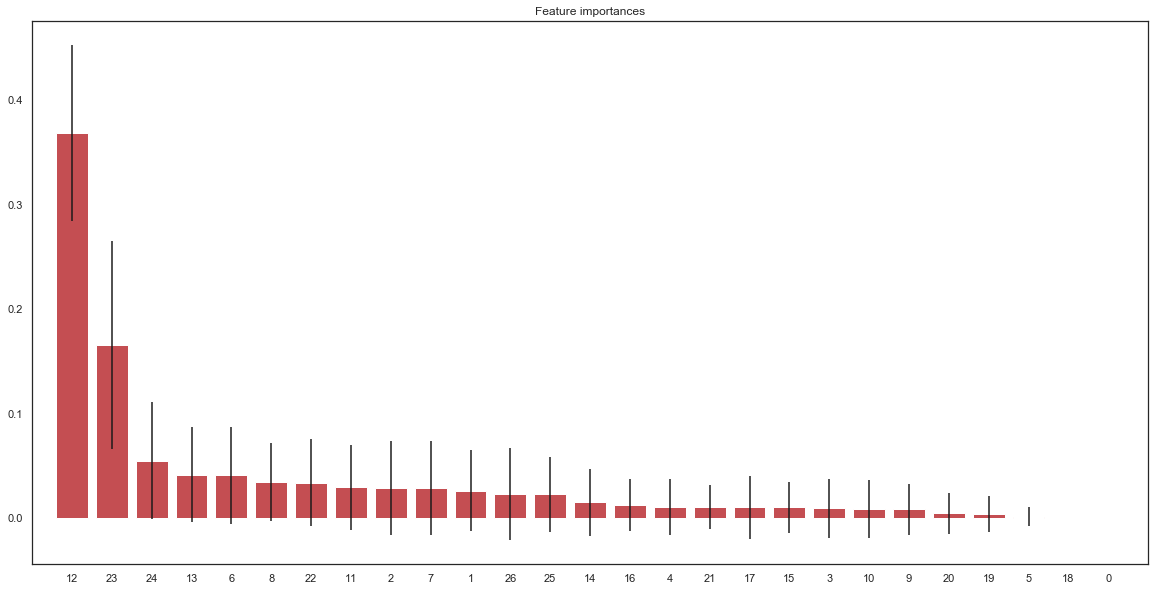

In [87]:
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### XG boost

In [56]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
eval_set = [(X_train,y_train), (X_test,y_test)]
xg_reg.fit(X_train,y_train,early_stopping_rounds=45, eval_metric=["rmse"], eval_set=eval_set, verbose=True )

[0]	validation_0-rmse:7.90603	validation_1-rmse:8.26087
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 45 rounds.
[1]	validation_0-rmse:5.93274	validation_1-rmse:6.47655
[2]	validation_0-rmse:4.56533	validation_1-rmse:5.29519
[3]	validation_0-rmse:3.58993	validation_1-rmse:4.63157
[4]	validation_0-rmse:2.91709	validation_1-rmse:4.21134
[5]	validation_0-rmse:2.44809	validation_1-rmse:3.96267
[6]	validation_0-rmse:2.14079	validation_1-rmse:3.79924
[7]	validation_0-rmse:1.95538	validation_1-rmse:3.74030
[8]	validation_0-rmse:1.72393	validation_1-rmse:3.70585
[9]	validation_0-rmse:1.50616	validation_1-rmse:3.71080
[10]	validation_0-rmse:1.31804	validation_1-rmse:3.71938
[11]	validation_0-rmse:1.20345	validation_1-rmse:3.65666
[12]	validation_0-rmse:1.14944	validation_1-rmse:3.65414
[13]	validation_0-rmse:1.09956	validation_1-rmse:3.66204
[14]	validation_0-rmse:1.04763	validation_1-rmse:3.66

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [61]:
y_predXGB = xg_reg.predict(X_test)
predictions = [round(value) for value in y_predXGB]

####  Model evaluation and feature importance ranking

In [62]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXG)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXG))
print('R squared', metrics.r2_score(y_test,predictions))

Mean Absolute Error:  2.9366619886257945
Mean Squared Error:  13.353353038930775
Root Mean Squared Error:  3.8068185343999676
Explained Variance Score:  0.15796362525431296
R squared 0.23232618257749804


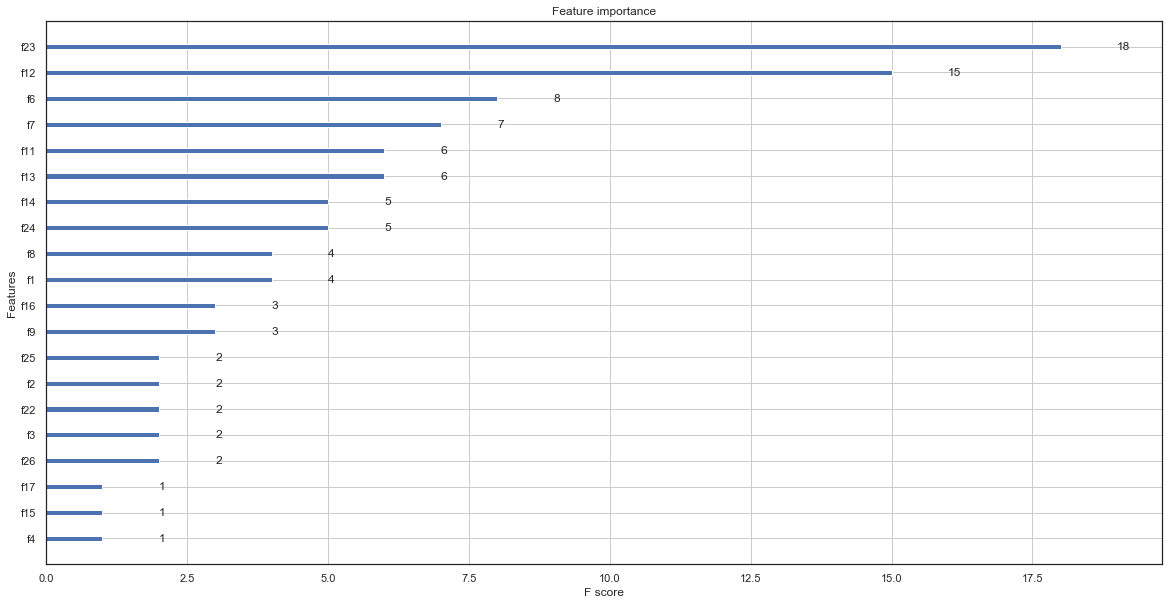

In [82]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [66]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=41,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0,
                          subsample=0.75,
                          colsample_bytree=0.95,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=41, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.021,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.75,
             tree_method=None, validate_parameters=False, verbosity=None)

In [67]:
predictions2 = xg_reg2.predict(X_test)


In [69]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions2))

Mean Absolute Error:  2.9310054118499096
Mean Squared Error:  12.68329915316459
Root Mean Squared Error:  3.5613619800807372
Explained Variance Score:  0.2647437195060135


In [70]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}
gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 2, 'min_child_weight': 5}, -2.5589155972730304)

In [71]:
#Tuning Gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.5}, -2.618275769440504)

In [72]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.85}, -2.603168296429419)

In [73]:
# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.24}, -2.6111099116605674)

In [74]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 33}, -2.6048002719537333)

In [77]:
# Tuning No. of trees
param_test6 = {
 'learning_rate':[0.1,0.05,0.001,0.007,0.005]
}
gsearch6 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test6, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.1}, -2.6196948767135644)

In [79]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg7 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=33,
                          max_depth=2,
                          min_child_weight=5,
                          gamma=0.5,
                          subsample=0.85,
                          colsample_bytree=0.9,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.021,
                          seed=42,
                          )
xg_reg7.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.5, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=33, n_jobs=4, nthread=4, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0.021,
             reg_lambda=1, scale_pos_weight=1, seed=42, subsample=0.85,
             tree_method=None, validate_parameters=False, verbosity=None)

In [80]:
predictions7 = xg_reg7.predict(X_test)


In [81]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,predictions7))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,predictions7))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,predictions7)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,predictions7))

Mean Absolute Error:  2.9567544202267864
Mean Squared Error:  13.398464752476498
Root Mean Squared Error:  3.6603913387063542
Explained Variance Score:  0.23111497458627606
